In [1]:
# Requeriments: pip install matplotlib
from misc_ploting import * #we import numpy, matplotlib, plt and ListedColormap here

### Selección de Dataset

In [2]:
dataset_name = "ls_orchid"
dataset_name = "usp_987"
dataset_name = "usp_f"

### Selección de Complejidad y Carga de Datos:

In [3]:
#################################################
#Select complexity:
# 1: Icalc
# 2: Discrepancia
# 3: Discrepancia en Bloque 2
# 4: Kolmogorov / BDM algorithmic complexity estimation (bits)
# 5: Bennett / BDM logical depth estimation (steps)
# 6: Shannon entropy (bit(s))
# 7: Second order entropy (bit(s))
# 8: Compression length (using gzip) (bits)
selection = 2
#################################################

[complexity, orig_res, shuf_res, rand_res, sing_res, sort_res, y_range] = get_parameters_for(selection, dataset_name)
sizes = read_list_from_file("data/sizes_" + dataset_name + ".txt")

#Convierte el tipo de list a numpy.ndarray
Xs = np.matrix(shuf_res).A
Xr = np.matrix(rand_res).A

mean_s = Xs.mean(axis=0)
sigma_s = Xs.std(axis=0)
mean_r = Xr.mean(axis=0)
sigma_r = Xr.std(axis=0)

colors = ['lightblue', 'orange', 'tomato', "lightgray", "thistle"]
#         original     shuffled  random    single char  sorted

### Deficinición de Funciones de Ploting

In [4]:
show_title = False; show_bin_size = False; show_text = True
#defino las funciones de ploting acá para poder usar las varables globales del Jupyter que sea más dinámico y menos engorroso usar las funciones

def plot_original_vs_means_random_and_shuffled_with_std_dev(outliers:bool = False, log_x:bool = True, alpha_dots:float = 0.3, alpha_std_dev:float = 0.3)  -> None:
    fig = plt.figure(figsize=(10, 6), layout='constrained')
    axs = fig.subplot_mosaic([["main","main", "original"],
                              ["main","main", "shuffled"],
                              ["main","main", "random"]],
                              sharex=True, sharey=True)

    if show_title:
        fig.suptitle("Complejidad en " + complexity + " para " + dataset_name + " y prom. de Shuffled y Random con Desvío Estándard" + ("" if outliers else " sin outliers"))
        axs["original"].set_title("Original")
        axs["shuffled"].set_title("Prom. Shuffled")
        axs["random"].set_title("Prom. Random")

    for a in axs.values():
        a.plot(sizes, sing_res, 'o', markersize=2, label = "Single Char.", color=colors[3], alpha=alpha_dots)
        a.plot(sizes, sort_res, 'o', markersize=2, label = "Sorted Char.", color=colors[4], alpha=alpha_dots)
    axs["main"].plot(sizes, orig_res,'s', markersize=2, label = "Original", color=colors[0], alpha=alpha_dots)
    axs["main"].plot(sizes, mean_s, 'o', markersize=2, label = "Prom. Shuffled", color=colors[1], alpha=alpha_dots)
    axs["main"].plot(sizes, mean_r, 'o', markersize=2, label = "Prom. Random", color=colors[2], alpha=alpha_dots)
    axs["main"].fill_between(sizes, mean_s+sigma_s, mean_s-sigma_s, facecolor=colors[1], alpha=alpha_std_dev)
    axs["main"].fill_between(sizes, mean_r+sigma_r, mean_r-sigma_r, facecolor=colors[2], alpha=alpha_std_dev)

    legend = axs["main"].legend()
    for handle in legend.get_lines(): #to make the legend more visible
        handle.set_alpha(1)
        handle.set_markersize(4)

    axs["original"].plot(sizes, orig_res, 's', markersize=1, color=colors[0], alpha=alpha_dots)

    axs["shuffled"].plot(sizes, mean_s, 'o', markersize=1, color=colors[1], alpha=alpha_dots)
    axs["shuffled"].fill_between(sizes, mean_s+sigma_s, mean_s-sigma_s, facecolor=colors[1], alpha=alpha_std_dev)
    
    axs["random"].plot(sizes, mean_r, 'o', markersize=1, color=colors[2], alpha=alpha_dots)
    axs["random"].fill_between(sizes, mean_r+sigma_r, mean_r-sigma_r, facecolor=colors[2], alpha=alpha_std_dev)

    for a in axs.values():
        a.set_ylabel(complexity)
        a.set_xlabel("Cantidad de aminoácidos")
        a.tick_params(labelleft=True)
        if log_x:
            a.set_xscale('log')
        if not outliers:
            a.set_ylim(y_range)
            upper_limit = get_upper_limit(sizes, 1000)
            a.set_xlim(40, upper_limit)

    axs["main"].set_ylabel("Complejidad en " + complexity)
    axs["main"].set_xlabel("Cantidad de aminoácidos" + (" en escala logarítmica" if log_x else ""))

    if show_text:
        for a, y, label in zip(axs.values(), [-0.11, -0.25, -0.25, -0.43],
                ["(a) Original, Prom. Shuffled y Prom. Random", "(b) Original", "(c) Prom. Shuffled", "(d) Prom. Random"]):
            a.text(0.5, y, label, transform=a.transAxes, fontsize=10, ha='center', va='top')

    set_grid(axs.values())

    plt.show()
    print_boxplot_lines(mean_s, mean_r, orig_res)

def plot_detail_of_shuffled_and_random(outliers:bool = False, log_x:bool = True, alpha_dots:float = 0.3, alpha_std_dev:float = 0.3)  -> None:
    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)

    if show_title:
        fig.suptitle("Detalle sobre el Desvío Estándar para los Prom. de los Dataset Shuffled y Random" + ("" if outliers else " sin outliers"))
        ax1.set_title("Shuffled")
        ax2.set_title("Random")

    ax1.set_ylabel("Complejidad en " + complexity)
    ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else ""))
    ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else ""))

    ax1.plot(sizes, mean_s, 'o', markersize=1, label='shuffled', color=colors[1], alpha=alpha_dots)
    ax1.fill_between(sizes, mean_s+sigma_s, mean_s-sigma_s, facecolor=colors[1], alpha=alpha_std_dev)
    ax1.grid()
    ax2.plot(sizes, mean_r, 'o', markersize=1, label='random', color=colors[2], alpha=alpha_dots)
    ax2.fill_between(sizes, mean_r+sigma_r, mean_r-sigma_r, facecolor=colors[2], alpha=alpha_std_dev)
    ax2.grid()

    if show_text:
        for a, label in zip((ax1, ax2), ["(a) Prom. Shuffled", "(b) Prom. Random"]):
            a.text(0.5, -0.14, label, transform=a.transAxes, fontsize=10, ha='center', va='top')

    if log_x:
        ax1.set_xscale('log')
        ax2.set_xscale('log')
    if not outliers:
        for a in (ax1, ax2):
            a.set_ylim(y_range)
            upper_limit = get_upper_limit(sizes, 1000)
            a.set_xlim(40, upper_limit)

    set_grid((ax1, ax2))

    plt.show()


##  HISTOGRAMAS 2D ##
x_lim = 1000

def plot_with_and_without_outlayers(data, title:str, log_x:bool = True, bins_x:int = 500, bins_y:int = 200) -> None:
    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)

    if show_title: fig.suptitle(dataset_name + " " + title + " en complejidad " + complexity)
    ax1.set_title("Con Outlayers")
    ax2.set_title("Sin Outlayers")
    ax1.set_ylabel("Complejidad en " + complexity)
    ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else ""))
    ax1.set_ylabel("Complejidad en " + complexity + (" (bin size = " + str((y_range[1]-y_range[0])/bins_y)[:7] + ")" if show_bin_size else ""))
    ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))

    ax1.plot(sizes, data, 'o', markersize=1)
    ax1.grid()

    magma = get_colormap()
    hist_info = ax2.hist2d(sizes, data, bins=(bins_x, bins_y),
            range = [[0, x_lim], y_range],
            cmap = magma)
    # ax2.hist2d devuelve (counts, xedges, yedges, Image) y sólo necesito el Image
    fig.colorbar(hist_info[3], ax=ax2)

    if log_x:
        ax1.set_xscale('log')
        ax2.set_xscale('log')
        ax2.set_xlim(40, 1000)
    
    set_grid((ax1, ax2))

    plt.show()
    if not show_bin_size: print("Bin sizes: on x: " + str(x_lim/bins_x)[:7] + " and on y: " + str((y_range[1]-y_range[0])/bins_y)[:7])

def plot_density_without_ouliers_for_shuffled_and_random(log_x:bool = True, bins_x:int = 500, bins_y:int = 200) -> None:
    all_s,  all_r, all_sizes = [], [], []
    for i in range(10):
        all_s = all_s + shuf_res[i]
        all_r = all_r + rand_res[i]
        all_sizes = all_sizes + sizes

    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)

    if show_title: fig.suptitle("Detalle sobre el la Densidad para los Dataset Shuffled y Random, sin outliers")
    ax1.set_title("Shuffled")
    ax2.set_title("Random")
    ax1.set_ylabel("Complejidad en " + complexity + (" (bin size = " + str((y_range[1] - y_range[0])/bins_y)[:7] + ")" if show_bin_size else ""))
    ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))
    ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))

    magma = get_colormap()
    norm = get_norm(1000, all_sizes, all_s, all_r, bins_x, bins_y, [[0, x_lim], y_range])

    ax1.hist2d(all_sizes, all_s, bins=(bins_x, bins_y), 
            range = [[0, x_lim], y_range],
            cmap = magma, norm = norm)

    hist_info = ax2.hist2d(all_sizes, all_r, bins=(bins_x, bins_y),
            range = [[0, x_lim], y_range],
            cmap = magma, norm = norm)
    # ax2.hist2d devuelve (counts, xedges, yedges, Image) y sólo necesito el Image
    fig.colorbar(hist_info[3], ax=ax2)

    if log_x:
        for ax in (ax1, ax2):
            ax.set_xscale('log')
            ax.set_xlim(40, 1000)
    
    set_grid((ax1, ax2))

    plt.show()
    if not show_bin_size: print("Bin sizes: on x: " + str(x_lim/bins_x)[:7] + " and on y: " + str((y_range[1]-y_range[0])/bins_y)[:7])

def plot_density_without_ouliers_for_original(log_x:bool = True, bins_x:int = 500, bins_y:int = 200) -> None:
    plt.figure(figsize=(10, 7))
    if show_title: plt.title("Densidad de " + dataset_name + " Original en " + complexity)
    plt.ylabel("Complejidad en " + complexity + (" (bin size = " + str((y_range[1] - y_range[0])/bins_y)[:7] + ")" if show_bin_size else ""))
    plt.xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))

    magma = get_colormap()
    plt.hist2d(sizes, orig_res, bins=(bins_x,bins_y), 
            range = [[0, x_lim], y_range],
            cmap = magma)
    plt.colorbar()

    if log_x:
        plt.xscale('log')
        plt.xlim(40, 1000)

    set_grid([plt])

    plt.show()
    if not show_bin_size: print("Bin sizes: on x: " + str(x_lim/bins_x)[:7] + " and on y: " + str((y_range[1]-y_range[0])/bins_y)[:7])

def plot_original_over_shufled_and_random(log_x:bool = True, bins_x:int = 500, bins_y:int = 200) -> None:
    quotient_s = np.divide(np.array(orig_res), mean_s)
    quotient_r = np.divide(np.array(orig_res), mean_r)
    y_range2 = get_y_range2(complexity)

    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)

    if show_title:
        fig.suptitle(dataset_name + " Original / Prom. Shuffled y Random punto a punto")
        ax1.set_title("Shuffled")
        ax2.set_title("Random")

    ax1.set_ylabel("Complejidad en " + complexity + " / Prom" + (". (bin size = " + str((y_range2[1] - y_range2[0])/bins_y)[:7] + ")" if show_bin_size else "edio"))
    ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))
    ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))

    magma = get_colormap()
    norm = get_norm(100, sizes, quotient_s, quotient_r, bins_x, bins_y, [[0, x_lim], y_range2])

    ax1.hist2d(sizes, quotient_s, bins=(bins_x, bins_y), 
            range = [[0, x_lim], y_range2],
            cmap = magma, norm = norm)

    hist_info = ax2.hist2d(sizes, quotient_r, bins=(bins_x, bins_y),
            range = [[0, x_lim], y_range2],
            cmap = magma, norm = norm)

    # ax2.hist2d devuelve (counts, xedges, yedges, Image) y sólo necesito el Image
    fig.colorbar(hist_info[3], ax=ax2)

    if log_x:
        for a in (ax1, ax2):
            a.set_xscale('log')
            a.set_xlim(40, 1000)

    if show_text:
        for a, label in zip((ax1, ax2), ["(a) Shuffled", "(b) Random"]):
            a.text(0.5, -0.14, label, transform=a.transAxes, fontsize=10, ha='center', va='top')

    set_grid((ax1, ax2))

    plt.show()

    
    if not show_bin_size: print("Bin sizes: on x: " + str(x_lim/bins_x)[:7] + " and on y: " + str((y_range2[1] - y_range2[0])/bins_y)[:7])
    print_boxplot_lines(quotient_s, quotient_r)
    
def plot_original_over(dataset:np.ndarray, type:str, log_x:bool = True, bins_x:int = 500, bins_y:int = 200) -> None:
    quotient = np.divide(np.array(orig_res), dataset)
    y_range2 = get_y_range2(complexity)

    plt.figure(figsize=(10, 7))
    if show_title: plt.title(dataset_name + " Original / Prom. " + type + " punto a punto")
    plt.ylabel("Compl. " + complexity + " / Prom. " + complexity + " " + type + (" (bin size = " + str((y_range2[1] - y_range2[0])/bins_y)[:7] + ")" if show_bin_size else ""))
    plt.xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + (" (bin size = " + str(x_lim/bins_x)[:7] + ")" if show_bin_size else ""))

    magma = get_colormap()
    plt.hist2d(sizes, quotient, bins=(bins_x,bins_y), 
            range = [[0, x_lim], y_range2],
            cmap = magma)
    plt.colorbar()

    if log_x:
        plt.xscale('log')
        plt.xlim(40, 1000)

    set_grid([plt])

    plt.show()
    if not show_bin_size: print("Bin sizes: on x: " + str(x_lim/bins_x)[:7] + " and on y: " + str((y_range2[1] - y_range2[0])/bins_y)[:7])

#### Honestamente, el mejor gráfico de todos los tiempos:

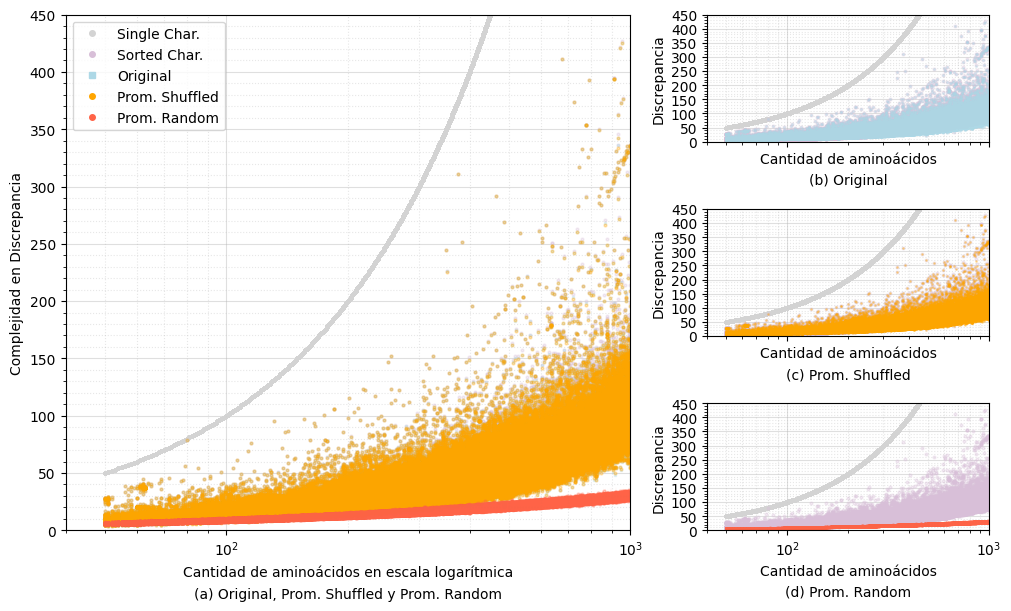

Boxplot lines Shuffled: |92.5--[49.6|33.3]21.0--|4.0
Boxplot lines Random  : |31.8--[20.0|16.0]12.1--|4.9
Boxplot lines Original: |93--[50.0|34.0]21.0--|4


In [5]:
plot_original_vs_means_random_and_shuffled_with_std_dev(log_x = True)

##### Detalle sobre el desvío estándar de los casos generados

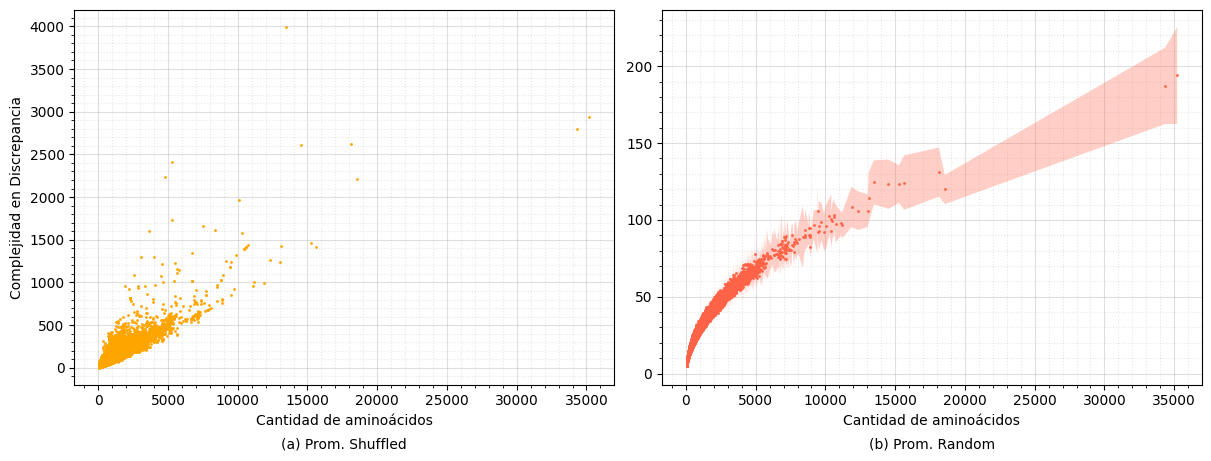

In [12]:
plot_detail_of_shuffled_and_random(True, False, alpha_dots=1)

##### Comparación con y sin outliers

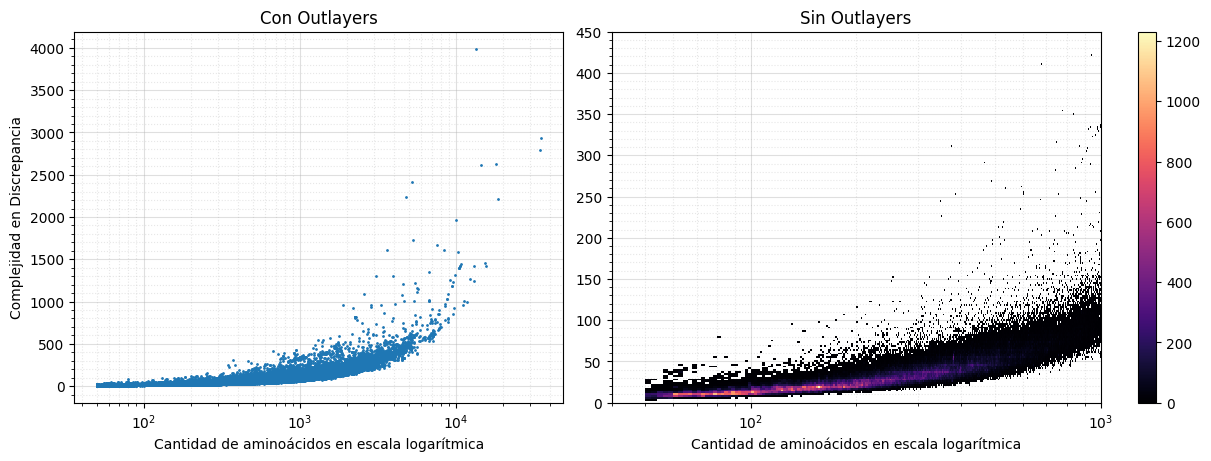

Bin sizes: on x: 2.0 and on y: 2.25


In [7]:
#plot_with_and_without_outlayers(orig_res, "Original")
plot_with_and_without_outlayers(mean_s, "Shuffled (mean)")
#plot_with_and_without_outlayers(mean_r, "Random (mean)")

### Histogramas 2D

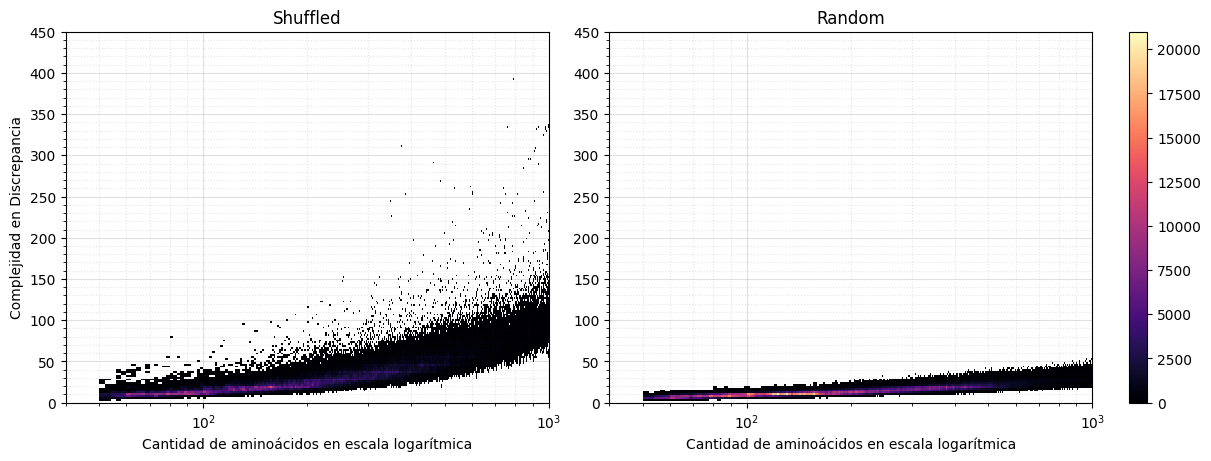

Bin sizes: on x: 2.0 and on y: 2.25


In [8]:
plot_density_without_ouliers_for_shuffled_and_random()

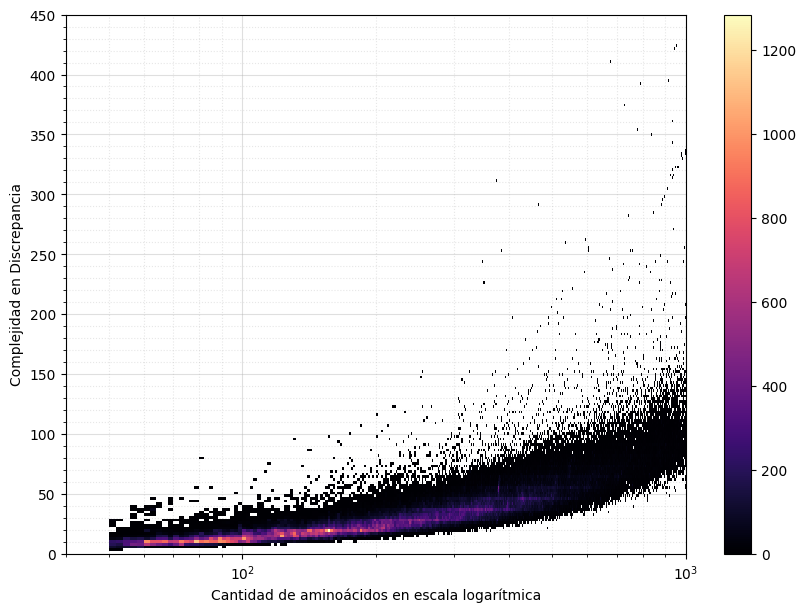

Bin sizes: on x: 2.0 and on y: 2.25


In [9]:
plot_density_without_ouliers_for_original()

### Complejidad original / prom. complejidad shuffled punto a punto

In [10]:
def get_y_range2(complexity:str) -> list: #estos deben ser harcodeados porque de ser automatizados lo arruinan los outliers
    return [0.1, 1.4]
    if   complexity == 'Icalc':
        return [0.1, 1.1]
    elif complexity == 'Discrepancia':
        return [0.5, 9.5] #[0.8, 1.3]
    elif complexity == 'Kolmogorov':
        return [0.1, 1.3]
    elif complexity == 'Bennett':
        return [0.4, 1.4]
    else:
        return [0.1, 1.1]

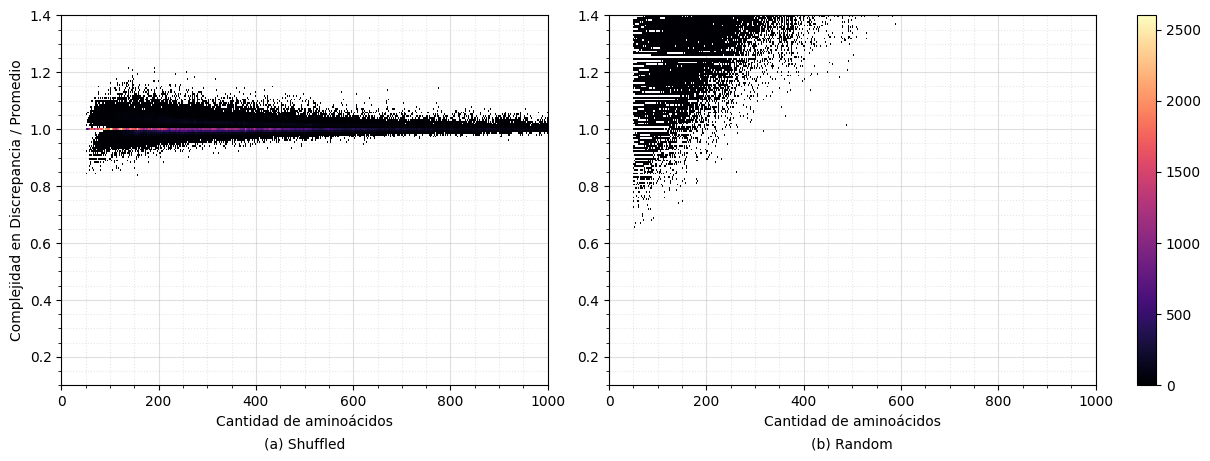

Bin sizes: on x: 2.0 and on y: 0.00649
Boxplot lines Shuffled: |1.00439--[1.0|1.0]0.99706--|0.99268
Boxplot lines Random  : |3.91129--[2.58064|2.08695]1.69354--|0.65573


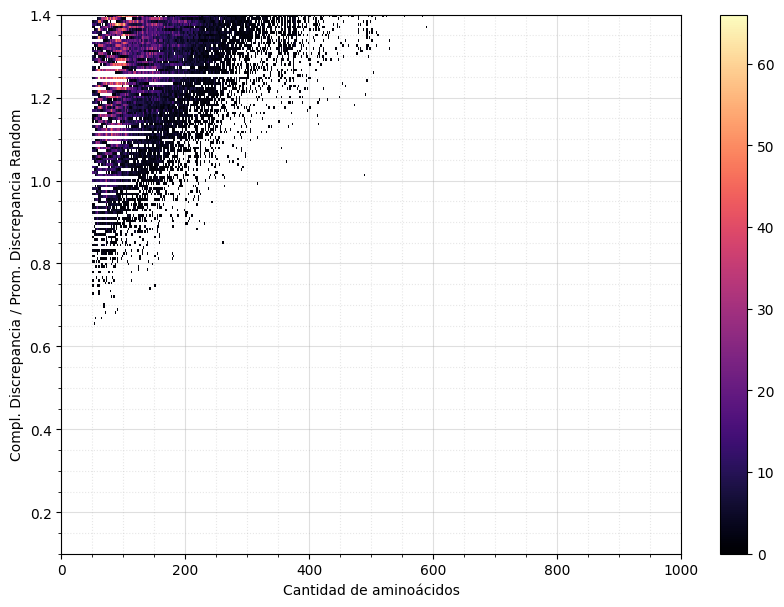

Bin sizes: on x: 2.0 and on y: 0.00649


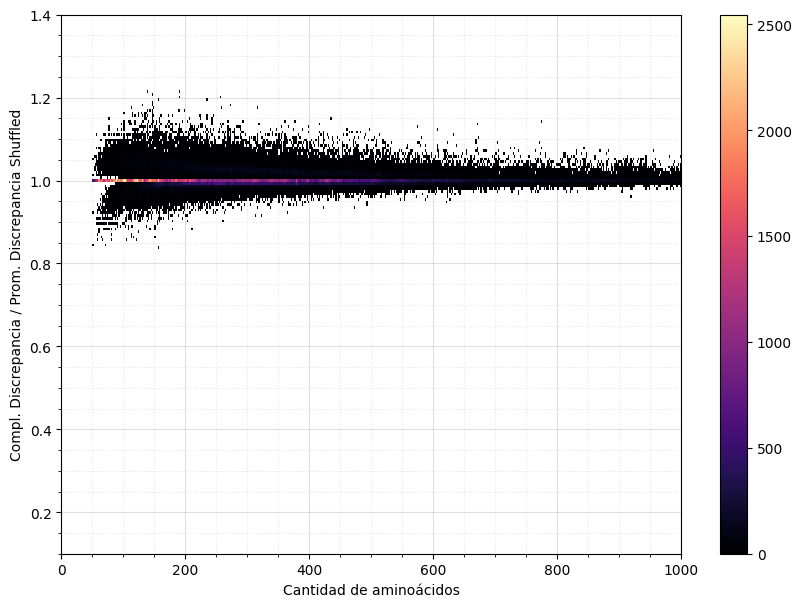

Bin sizes: on x: 2.0 and on y: 0.00649


In [11]:
plot_original_over_shufled_and_random(False)
plot_original_over(mean_r, "Random", False)
plot_original_over(mean_s, "Shuffled", False)